# 15.8 (CLASSIFICATION WITH THE IRIS DATASET: HYPERPARAMETER TUNING)

Using scikit-learn’s KFold class and cross_val_score function, determine the optimal k value for classifying Iris samples using a KNeighborsClassifier.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split


## Step 1. Loading the Data

In [ ]:
iris_datasets = datasets.load_iris()
# optional:
# X = iris_datasets.data
# y = iris_datasets.target
df = pd.DataFrame(data = iris_datasets.data, columns = iris_datasets.feature_names)
df['target'] = iris_datasets.target

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.shape

(150, 5)

## Step 2. Information on the Dataset

In [4]:
print(iris_datasets.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

## Step 3. Split the Data into Training and Testing Data

In [47]:
# Split the data into training and testing data (80% training and 20% testing)
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris_datasets.data, iris_datasets.target, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

## Step 4. Creating the Model

The KNeighborsClassifier estimator (module sklearn.neighbors) implements the k-nearest neighbors algorithm. 

First, we create the KNeighborsClassifier estimator object:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# create an KNN estimator, then fit it to the training data
knn = KNeighborsClassifier(n_neighbors=5)



## Step 5. Training the Model

Next, we invoke the KNeighborsClassifier object’s fit method, which loads the sample training set (X_train) and target training set (y_train) into the estimator

In [49]:
knn.fit(X_train, y_train)
'''KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')'''

# make predictions on the test set
# Calling the estimator’s predict method with X_test as an argument returns an array containing the predicted class of each test sample
predicted=knn.predict(X_test)
expected = y_test

In [50]:
predicted[:20]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2])

In [8]:
expected[:20]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2])

This shows us that the predeicted value and expected value are the same

Estimator Method score
Each estimator has a score method that returns an indication of how well the estimator performs for the test data you pass as arguments.

 For classification estimators, this method returns the prediction accuracy for the test data

In [9]:
print("Accuracy:", metrics.accuracy_score(y_test, predicted))


Accuracy: 1.0


Each estimator has a score method that returns an indication of how well the estimator performs for the test data you pass as arguments.

For  classification estimators, this method returns the prediction accuracy for the test data:

In [10]:
print(f"{knn.score(X_test, y_test):.2%}")

100.00%


The kNeighborsClassifier’s with its default k (that is, n_neighbors=5) achieved 97.78% prediction accuracy. Shortly, we’ll perform hyperparameter tuning to try to determine the optimal value for k, hoping that we get even better accuracy.

## 6. Confusion Matrix
Another way to check a classification estimator’s accuracy is via a confusion matrix, which shows the correct and incorrect predicted values (also known as the hits and misses) for a given class. Simply call the function confusion_matrix from the sklearn.metrics module, passing the expected classes and the predicted classes as arguments, as in:

The y_true keyword argument specifies the test samples’ actual classes. People looked at the dataset’s images and labeled them with specific classes (the digit values). 

The y_pred keyword argument specifies the predicted digits for those test images.

In [11]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)
print(confusion)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Below is the confusion matrix produced by the preceding call. The correct predictions are shown on the diagonal from top-left to bottom-right. This is called the principal diagonal. The nonzero values that are not on the principal diagonal indicate incorrect predictions:

In [12]:
confusion

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

## 7. Classification report
The sklearn.metrics module also provides function classification_report, which produces a table of classification metrics5 based on the expected and predicted values:

In [13]:
from sklearn.metrics import classification_report

report = classification_report(y_true=expected, y_pred=predicted)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In the report:

precision is the total number of correct predictions for a given digit divided by the total number of predictions for that digit. You can confirm the precision by looking at each column in the confusion matrix. 

recall is the total number of correct predictions for a given digit divided by the total number of samples that should have been predicted as that digit. You can confirm the recall by looking at each row in the confusion matrix. 

f1-score—This is the average of the precision and the recall.

support—The number of samples with a given expected value. 

## 8.visualizing the confusion matrix
A heat map displays values as colors, often with values of higher magnitude displayed as more intense colors. Seaborn’s graphing functions work with two-dimensional data. When using a pandas DataFrame as the data source, Seaborn automatically labels its visualizations using the column names and row indices. Let’s convert the confusion matrix into a DataFrame, then graph it:

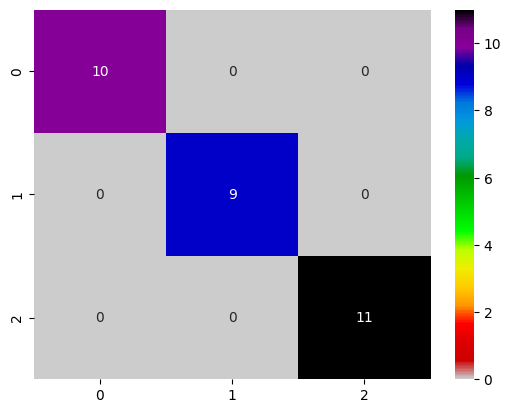

In [14]:
confusion_df = pd.DataFrame(confusion, index=range(3), columns=range(3))

import seaborn as sns

axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r', fmt='d')

## 9. K-Fold Cross-Validation
Using scikit-learn's cross_val_score(cv=10) which means 10 fold cross-validation.
K-fold cross-validation enables you to use all of your data for both training and testing, to get a better sense of how well your model will make predictions for new data by repeatedly training and testing the model with different portions of the dataset.K-fold cross-validation splits the dataset into k equal-size folds (this k is unrelated to k in the k-nearest neighbors algorithm). You then repeatedly train your model with k – 1 folds and test the model with the remaining fold. For example, consider using k = 10 with folds numbered 1 through 10. With 10 folds, we’d do 10 successive training and testing cycles:

First, we’d train with folds 1–9, then test with fold 10.

Next, we’d train with folds 1–8 and 10, then test with fold 9.

Next, we’d train with folds 1–7 and 9–10, then test with fold 8.

Scikit-learn provides the KFold class and the cross_val_score function (both in the module sklearn.model_selection) to help you perform the training and testing cycles described above. create a KFold object:

In [15]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# this allows me to shuffle the data before splitting into batches
# setting cv = kfold
# scores = cross_val_score(estimator=knn, X=iris_datasets.data, y=iris_datasets.target, cv=kfold)

The keyword arguments are:

n_splits=10, which specifies the number of folds.

random_state=11, which seeds the random number generator for reproducibility.

shuffle=True, which causes the KFold object to randomize the data by shuffling it before splitting it into folds. This is particularly important if the samples might be ordered or grouped. For example, the Iris dataset has 150 samples of three Iris species—the first 50 are Iris setosa, the next 50 are Iris versicolor and the last 50 are Iris virginica. If we do not shuffle the samples, then the training data might contain none of a particular Iris species and the test data might be all of one species.

In [16]:
# cv= 10 implies 10-fold cross-validation without shuffling
scores = cross_val_score(estimator=knn, X=iris_datasets.data, y=iris_datasets.target, cv=10)

The keyword arguments are:

estimator=knn, which specifies the estimator you’d like to validate.

X=digits.data, which specifies the samples to use for training and testing.

y=digits.target, which specifies the target predictions for the samples.

cv=kfold, which specifies the cross-validation generator that defines how to split the samples and targets for training and testing.

In [17]:
scores

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [18]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 96.67%


In [19]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 4.47%


## 10. Hyperparameter Tuning
we mentioned that k in the k-nearest neighbors algorithm is a hyperparameter of the algorithm. Hyperparameters are set before using the algorithm to train your model. In real-world machine learning studies, you’ll want to use hyperparameter tuning to choose hyperparameter values that produce the best possible predictions.

To determine the best value for k in the kNN algorithm, try different values of k then compare the estimator’s performance with each. We can do this using techniques similar to comparing estimators. The following loop creates KNeighborsClassifiers with odd k values from 1 through 19 (again, we use odd k values in kNN to avoid ties) and performs k-fold cross-validation on each. 

In [20]:
K_range = list(range(1,31))
k_scores = []
for K in K_range:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(estimator=knn, X=iris_datasets.data, y=iris_datasets.target, cv=10, scoring="accuracy")
    print(f'K={K}: Mean accuracy: {scores.mean():.2%}, Accuracy standard deviation: {scores.std():.2%}')
    

K=1: Mean accuracy: 96.00%, Accuracy standard deviation: 5.33%
K=2: Mean accuracy: 95.33%, Accuracy standard deviation: 5.21%
K=3: Mean accuracy: 96.67%, Accuracy standard deviation: 4.47%
K=4: Mean accuracy: 96.67%, Accuracy standard deviation: 4.47%
K=5: Mean accuracy: 96.67%, Accuracy standard deviation: 4.47%
K=6: Mean accuracy: 96.67%, Accuracy standard deviation: 4.47%
K=7: Mean accuracy: 96.67%, Accuracy standard deviation: 4.47%
K=8: Mean accuracy: 96.67%, Accuracy standard deviation: 4.47%
K=9: Mean accuracy: 97.33%, Accuracy standard deviation: 3.27%
K=10: Mean accuracy: 96.67%, Accuracy standard deviation: 4.47%
K=11: Mean accuracy: 96.67%, Accuracy standard deviation: 4.47%
K=12: Mean accuracy: 97.33%, Accuracy standard deviation: 3.27%
K=13: Mean accuracy: 98.00%, Accuracy standard deviation: 3.06%
K=14: Mean accuracy: 97.33%, Accuracy standard deviation: 4.42%
K=15: Mean accuracy: 97.33%, Accuracy standard deviation: 3.27%
K=16: Mean accuracy: 97.33%, Accuracy standard de

The following use the cross_valdation_value function to get the K_scores using a loop

In [23]:

import matplotlib.pyplot as plt


K_range = list(range(1,31))
k_scores = []
for K in K_range:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(estimator=knn, X=iris_datasets.data, y=iris_datasets.target, cv=10, scoring="accuracy")
    k_scores.append(scores.mean())
print(k_scores)
    


[np.float64(0.96), np.float64(0.9533333333333334), np.float64(0.9666666666666666), np.float64(0.9666666666666666), np.float64(0.9666666666666668), np.float64(0.9666666666666668), np.float64(0.9666666666666668), np.float64(0.9666666666666668), np.float64(0.9733333333333334), np.float64(0.9666666666666668), np.float64(0.9666666666666668), np.float64(0.9733333333333334), np.float64(0.9800000000000001), np.float64(0.9733333333333334), np.float64(0.9733333333333334), np.float64(0.9733333333333334), np.float64(0.9733333333333334), np.float64(0.9800000000000001), np.float64(0.9733333333333334), np.float64(0.9800000000000001), np.float64(0.9666666666666666), np.float64(0.9666666666666666), np.float64(0.9733333333333334), np.float64(0.96), np.float64(0.9666666666666666), np.float64(0.96), np.float64(0.9666666666666666), np.float64(0.9533333333333334), np.float64(0.9533333333333334), np.float64(0.9533333333333334)]


Plotting Value of K for KNN VS. Cross_Validated Accaracy using a custom of loop 

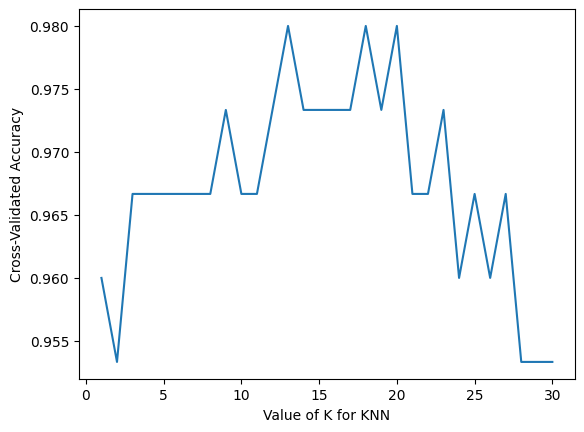

In [24]:
plt.plot(K_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.show()

In [28]:
K_range = list(range(11,16,))
k_scores = []
for K in K_range:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(estimator=knn, X=iris_datasets.data, y=iris_datasets.target, cv=10, scoring="accuracy")
    k_scores.append(scores.mean())
print(k_scores)

[np.float64(0.9666666666666668), np.float64(0.9733333333333334), np.float64(0.9800000000000001), np.float64(0.9733333333333334), np.float64(0.9733333333333334)]


### Plots of Value of K for KNN VS. Cross-Validated Accuracy

The plot in a small interval where the accuracy is the highest

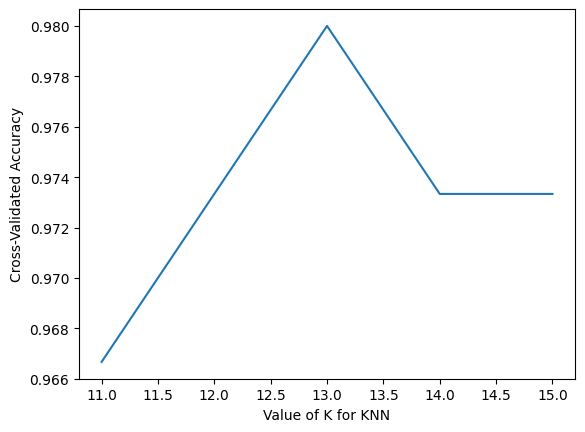

In [29]:
plt.plot(K_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.show()

## 11. GridSearchCV
Use GridSearchCV to confirm k=13 has the optimal parameter.

In [33]:
from sklearn.model_selection import GridSearchCV

In [30]:
# define the parameter values that should be searched
k_range = list(range(1,31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [31]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [34]:
# instantiate the gridsearch
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [35]:
grid.fit(iris_datasets.data, iris_datasets.target)

,estimator,KNeighborsCla..._neighbors=15)
,param_grid,"{'n_neighbors': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,13


In [45]:
# view the result as a dataframe only the first 6 lines

pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']][0:6]

,mean_test_score,std_test_score,params
0,0.960000,0.053333,{'n_neighbors': 1}
1,0.953333,0.052068,{'n_neighbors': 2}
2,0.966667,0.044721,{'n_neighbors': 3}
3,0.966667,0.044721,{'n_neighbors': 4}
4,0.966667,0.044721,{'n_neighbors': 5}
5,0.966667,0.044721,{'n_neighbors': 6}


In [39]:
# examine the first result
print(grid.cv_results_['params'][0])
print(grid.cv_results_['mean_test_score'][0])

{'n_neighbors': 1}
0.96


In [40]:
# print the array of mean scores only
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667 0.96       0.96666667 0.95333333 0.95333333 0.95333333]


The following plot is the Value of K for KNN VS. Cross-Validated Accuracy using GridsearchSV, which automatically and get the best value for K

Text(0, 0.5, 'Cross-Validated Accuracy')

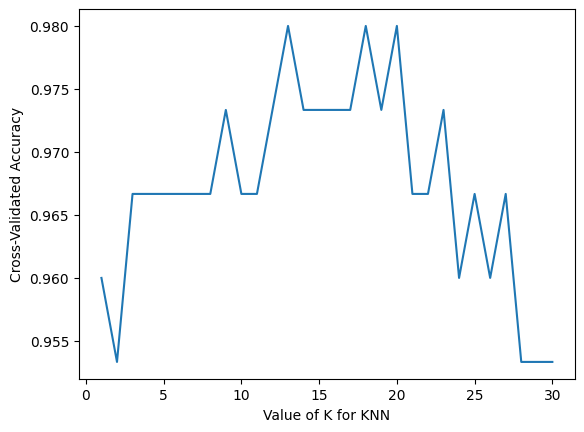

In [42]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## 12. THe best value of K

In [43]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13}
KNeighborsClassifier(n_neighbors=13)
